In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

__Odczytanie danych__

In [2]:
df_data_2D= pd.read_csv("data/data_2d.csv")
df_mnist= pd.read_csv("data/mnist.csv")

__Zastosowanie K-średnich__

In [3]:
def print_k_means_for_2d_data(X, labels, centroids):
    n_clusters = len(centroids)
    cmap = plt.get_cmap('tab20')
    colors = [cmap(label % 20) for label in labels]
    for i in range(n_clusters):
        plt.annotate(f'Centroid {i+1}', (centroids[i, 0], centroids[i, 1]), textcoords="offset points", xytext=(0,10), ha='center', zorder=3)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Centroids', marker='X', s=200, edgecolors='k', zorder=2)
    plt.scatter(X[:, 0], X[:, 1], c=colors, label='Original Points', alpha=0.6, edgecolors='w', s=100, zorder=1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KMeans Clustering Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
X_data_2D = df_data_2D.iloc[:, [1,2]].values
X_mnist = df_mnist.iloc[:, 1:].values

__Wizualizacja danych - data_2d__

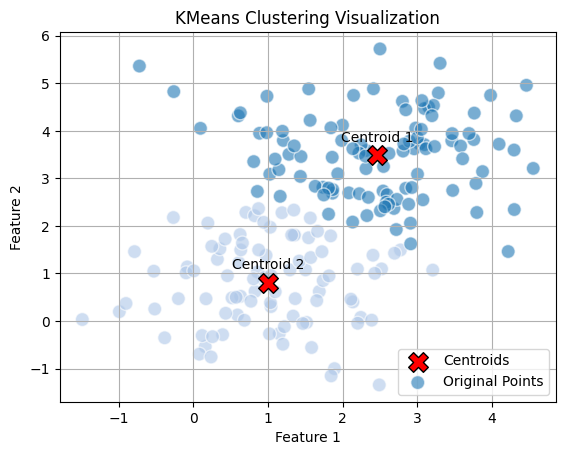

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_data_2D)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print_k_means_for_2d_data(X_data_2D, labels, centroids)

Redukcja wymiarowość danych do wersji dwuwymiarowej - X_mnist

In [6]:
y = df_mnist.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)



__Wizualizacja danych - mnist__

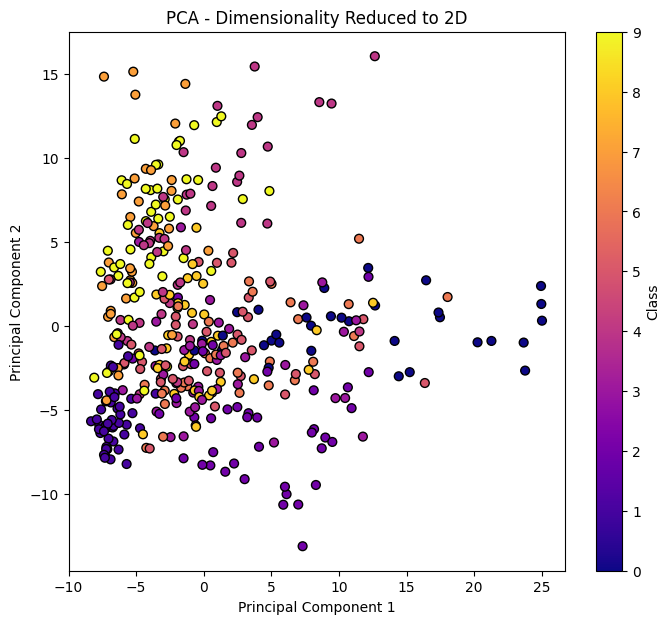

In [7]:
plt.figure(figsize=(8, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=40)
plt.title('PCA - Dimensionality Reduced to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

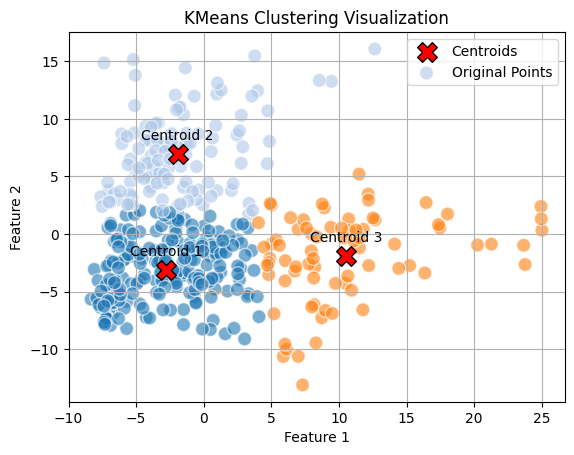

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print_k_means_for_2d_data(X_train_pca, labels, centroids)

__Metoda łokciowa__

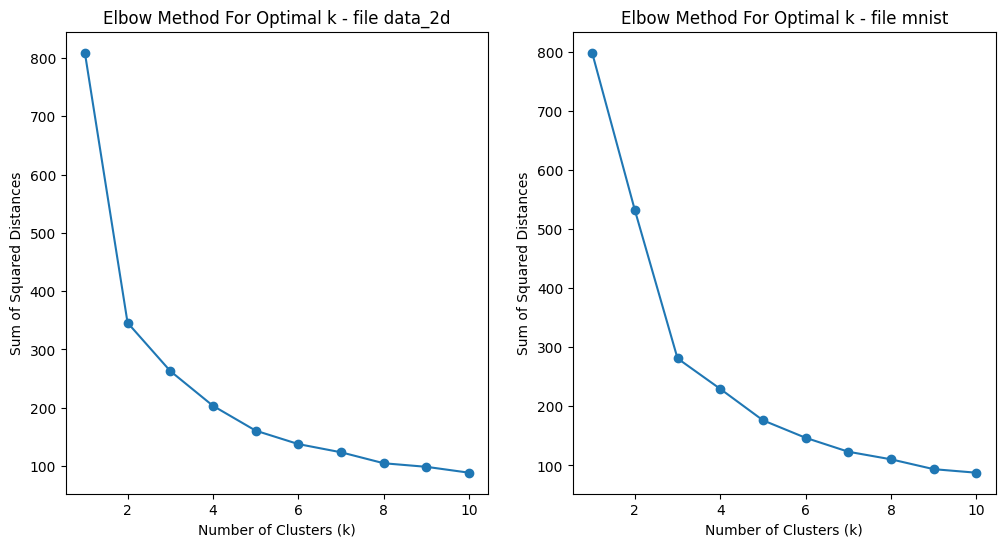

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sum_of_squared_distances = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_data_2D)
    sum_of_squared_distances.append(kmeans.inertia_)

ax1.plot(K_range, sum_of_squared_distances, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Distances')
ax1.set_title('Elbow Method For Optimal k - file data_2d')

sum_of_squared_distances = []
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train_pca)
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)
    
ax2.plot(K_range, sum_of_squared_distances, marker='o')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Sum of Squared Distances')
ax2.set_title('Elbow Method For Optimal k - file mnist')
plt.show()